# Sheet 8: Clustering Evaluation

In [16]:
from math import sqrt, log
import numpy as np
from numpy.linalg import norm
from numpy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
%matplotlib inline

## Conditional Entropy

$$H(T \vert C) = - \sum_{i=1}^r \sum_{j=1}^k \left(\frac{n_{ij}}{n}\right) log \left(\frac{n_{ij}}{n_i}\right)$$

In [52]:
def cond_entropy(y, y_hat):
    assert len(y) == len(y_hat)
    n = len(y) * 1.0
    k, r = len(np.unique(y)), len(np.unique(y_hat))
    c_keys, c_sizes = np.unique(y_hat, return_counts=True)
    c_sizes = dict(zip(c_keys, c_sizes))
    cont_mat = contingency_matrix(y, y_hat).T
    res = 0
    for i in range(r):
        for j in range(k):
            if cont_mat[i][j] != 0:
                res += cont_mat[i][j]/n * log(1.0*cont_mat[i][j]/c_sizes[i], 2)
    return res*-1

### Purity

$$purity = \frac{1}{n} \sum_{i=1}^{k} \max_{j=1}^k n_{ij}$$

In [ ]:
def purity(y, y_hat):
    cont_mat = contingency_matrix(y, y_hat).T
    return sum([max(cont_mat[i]) for i in range(r)])/n

## Pairwise measures

In [ ]:
def pairwise_measure(y, y_hat, index='jaccard'):
    """
    returns a similarity index of a labeling, given true and predicted labels.
    index is either 'jaccard' or 'rand' indicating which index to use.
    """
    assert len(y) == len(y_hat)
    assert index == 'jaccard' or index == 'rand'

    n = len(y)
    fp,fn,tp,tn = 0,0,0,0
    
    for i in range(n):
        for j in range(n):
            if y[i] == y[j]:
                if y_hat[i] == y_hat[j]:
                    tp += 1
                else:
                    fn += 1
            else:
                if y_hat[i] == y_hat[j]:
                    fp += 1
                else:
                    tp += 1
    
    if index == 'jaccard':
        return 1.0*tp/(tp+fn+fp)
    else:
        return 1.0*(tp+tn)/n

# Testing on some data

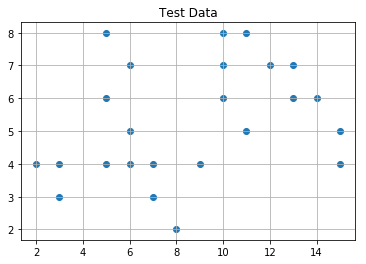

In [53]:
X = np.array([[2,4],[3,4],[3,3],[5,4],[5,6],[5,8],[6,4],[6,5],[6,7],
        [7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5],
        [11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]])
y = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

plt.figure()
plt.grid(True)
plt.title('Test Data')
plt.scatter(X[:,0], X[:,1])
plt.show()

In [54]:
Ks = [2,3,4,5,6]
for k in Ks:
    labels = KMeans(n_clusters=k).fit(X).labels_
    print(cond_entropy(y, labels))

0.42214782853321275
0.5782102893160785
0.318144667641655
-0.0
0.1147869792568112
